In [4]:
from matplotlib import pyplot as plt
from matplotlib import rcParams

import numpy as np
from scipy.spatial.distance import cosine

## Functions for plotting the sphere

In [2]:
def set_plot_params():
    """
    """
    rcParams['font.family'] = 'serif'
    rcParams['font.size'] = 25


def points_to_draw_sphere(radius, center, how_many):
    u, v = np.linspace(0, 2*np.pi, how_many), np.linspace(0, np.pi, how_many)
    u, v = np.meshgrid(u, v)
    x = np.cos(u)*np.sin(v) * radius - center[0]
    y = np.sin(u)*np.sin(v) * radius - center[1]
    z = np.cos(v) * radius - center[2]
    return x, y, z


def plot_3d_sphere(ax, center, radius, **kwargs):
    """
    """
    plot_center = kwargs.get('plot_center', False)
    plot_wireframe = kwargs.get('plot_wireframe', False)
    ax.view_init(30, 45)
    ax.set_aspect('auto')
    x, y, z = points_to_draw_sphere(radius, center, how_many=80)
    ax.plot_surface(x, y, z, color='violet', alpha=0.15)
    if plot_wireframe: 
        x, y, z = points_to_draw_sphere(radius, center, how_many=10)
        ax.plot_wireframe(x, y, z, color='gray', alpha=0.25, linewidth=1, linestyle='--')
    if plot_center: ax.scatter(xs=center[0], ys=center[1], zs=center[2], color='firebrick', s=50, zorder=0.99)


def plot_3d_vectors(ax, vectors, **kwargs):
    """
    """
    title = kwargs.get('title', '')
    symmetric_range = kwargs.get('symmetric_range', True)
    num_ticks = kwargs.get('num_ticks', 5)

    min_x, max_x = np.round(vectors[:,0].min(), 1), np.round(vectors[:,0].max(), 1)
    min_y, max_y = np.round(vectors[:,1].min(), 1), np.round(vectors[:,1].max(), 1)
    min_z, max_z = np.round(vectors[:,2].min(), 1), np.round(vectors[:,2].max(), 1)
    
    if symmetric_range:
        lim_x = np.max([np.abs(min_x), np.abs(max_x)])
        xticks = np.linspace(-lim_x, lim_x, num_ticks)
        lim_y = np.max([np.abs(min_y), np.abs(max_y)])
        yticks = np.linspace(-lim_y, lim_y, num_ticks)
        lim_z = np.max([np.abs(min_z), np.abs(max_z)])
        zticks = np.linspace(-lim_z, lim_z, num_ticks)
    else:
        xticks = np.linspace(min_x, max_x, num_ticks)
        yticks = np.linspace(min_y, max_y, num_ticks)
        zticks = np.linspace(min_z, max_z, num_ticks)


    ax.scatter(xs=vectors[:,0], ys=vectors[:,1], zs=vectors[:,2])
    ax.set_title(title)
    ax.set(xticks=xticks, xticklabels=xticks,
           yticks=yticks, yticklabels=yticks,
           zticks=zticks, zticklabels=zticks)


def plot_3d_representative_center(ax, point, hyperpshere_center):
    """
    """
    ax.scatter(point[0], point[1], point[2], color='darkorange', s=50, zorder=1.0)
    ax.plot(xs=[point[0], hyperpshere_center[0]], 
            ys=[point[1], hyperpshere_center[1]],
            zs=[point[2], hyperpshere_center[2]],
            color='darkorange', linewidth=4)


def plot_density(ax, distances, n_quantiles, **kwargs):
    """
    """
    # distances_q = np.quantile(distances, quantiles)
    title = kwargs.get('title', '')
    distances_q, _ = np.histogram(distances, bins=n_quantiles, density=True)
    quantiles = np.linspace(0.0, 1.0, n_quantiles)
    ax.bar(quantiles, distances_q, width=0.2, color='magenta', alpha=0.5)
    ax.set_title(title)
    ax.set(xticks=quantiles, xticklabels=quantiles)
    # ax.hist(distances, bins=bins, density=True, color='magenta')


def plot_3d_latent_space(**kwargs):
    """
    """
    center = kwargs.get('center', np.zeros(3))
    radius = kwargs.get('radius', 1)
    plot_center = kwargs.get('plot_center', False)
    plot_wireframe = kwargs.get('plot_wireframe', False)
    titles = kwargs.get('titles', ['', ''])
    
    set_plot_params()
    fig = plt.figure(num=0, figsize=(15,12))
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(24,12), subplot_kw={'projection':None})
    
    ax1.set_axis_off()
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    plot_3d_sphere(ax1, center, radius, plot_center=plot_center, plot_wireframe=plot_wireframe, title=titles[0])

    vectors = np.random.normal(size=(100, 3))
    vectors = vectors / np.linalg.norm(vectors, ord=2, axis=1, keepdims=True)
    plot_3d_vectors(ax1, vectors, title=titles[0])
    plot_3d_representative_center(ax1, vectors[-1,:], np.zeros(3))
    
    distances = np.stack([(cosine(vectors[i,:], vectors[-1,:])) for i in range(vectors.shape[0])])
    plot_density(ax2, distances=distances, n_quantiles=5, title=titles[1])

    plt.show()

<Figure size 1080x864 with 0 Axes>

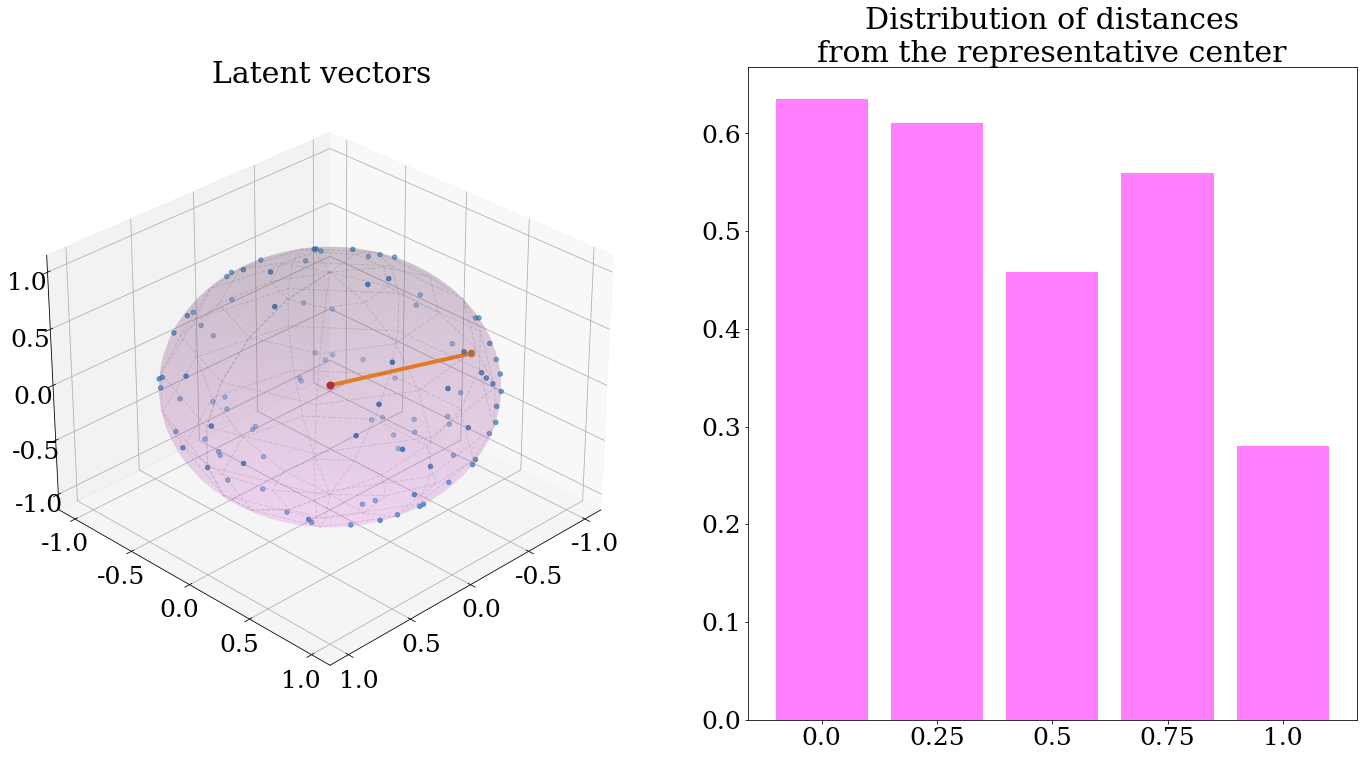

In [3]:
plot_3d_latent_space(radius=1, plot_center=True, plot_wireframe=True, titles=['Latent vectors', 'Distribution of distances\nfrom the representative center'])

## Plots of the anomaly scores

In [2]:
# this is the path to the anomaly score files. You can save the scores as .npy files in the evaluation function of the model
!ls ./data/ubnormal/saved_clip_scores

error_per_person_scene_12_scenario_4.npy
error_per_person_scene_13_scenario_8.npy
error_per_person_scene_15_scenario_5.npy
error_per_person_scene_17_scenario_5.npy
error_per_person_scene_17_scenario_9.npy
error_per_person_scene_1_scenario_6.npy
error_per_person_scene_1_scenario_7.npy
error_per_person_scene_21_scenario_1.npy
error_per_person_scene_27_scenario_3.npy
error_per_person_scene_2_scenario_1.npy
error_per_person_scene_3_scenario_2.npy
error_per_person_scene_5_scenario_8.npy
error_per_person_scene_7_scenario_6.npy
error_per_person_scene_8_scenario_2.npy
error_per_person_scene_9_scenario_7.npy


In [33]:
""" 
This code is shown as an example. It assumes that 
1. `base_path` contains the .npy files with the anomaly scores for the clips to visualize; 
2. `ground_truth_path` contains the .npy files with the ground truth masks corresponding to the clips to visualize
"""

base_path = './data/ubnormal/saved_clip_scores/'
scene, clip = (8,2)
model_anomaly_scores_path = base_path + f'error_per_person_scene_{scene}_scenario_{clip}.npy' 
ground_truth_path = f'./data/ubnormal/saved_clip_scores/gt_masks/scene_{scene}_scenario_{clip}.npy'

error_per_person = np.load(model_anomaly_scores_path)
gt = np.load(ground_truth_path)

In [34]:
error_per_person.shape

(8, 461)

In [15]:
"""
This is an example of post-processing of the clips' anomaly score. Make sure that this function matches the actual one of the official codebase
to avoid inconsistent visualizations.
"""

from scipy.ndimage import gaussian_filter1d

def score_process(score, win_size=50, dataname='STC', use_scaler = False):
        
    scores_shifted = np.zeros_like(score)
    shift = 8 + (8 // 2) - 1
    scores_shifted[shift:] = score[:-shift]
    score = gaussian_filter1d(scores_shifted, win_size)
        
    return score

In [6]:
"""
Example of operations to clean the scores of scene 27 scenario 3
"""

error_per_person[3,:] = 0
error_per_person[3,:100] = error_per_person[7,:100]
error_per_person[7,:100] = 0 
error_per_person[3,94:100] = 0
error_per_person[8,:100] = 0
error_per_person[3, :100] = error_per_person[3, :100] + error_per_person[6,:100]
error_per_person[7,300:] = error_per_person[7,300:] + error_per_person[6,300:]

In [7]:
reconstructed = [error_per_person[0,:]+error_per_person[2,:]+error_per_person[5,:],
                 error_per_person[1,:]+error_per_person[9,:],
                 error_per_person[3,:],
                 error_per_person[7,:],
                 error_per_person[8,:]]
reconstructed = np.stack(reconstructed, axis=0)

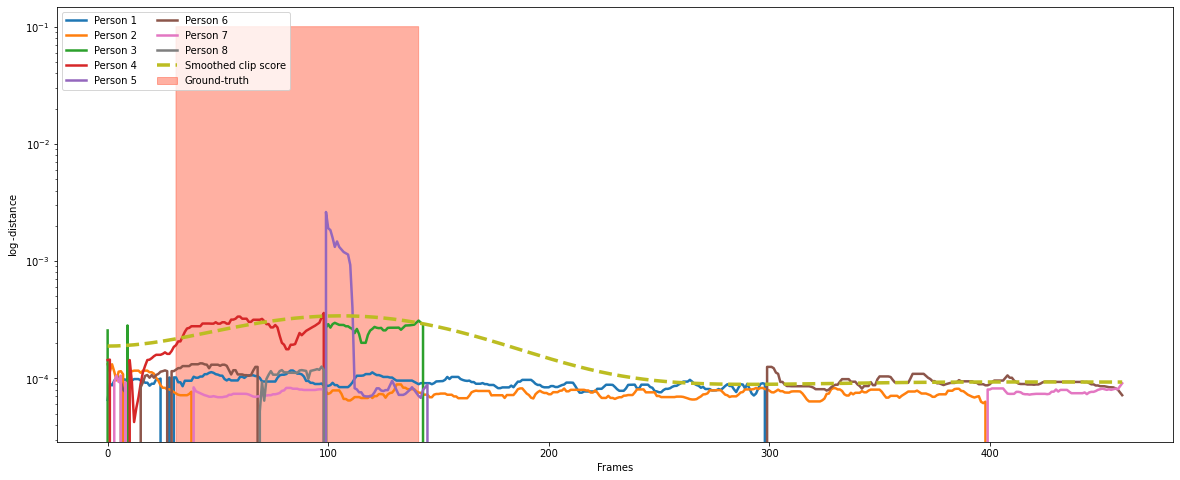

In [35]:
"""
Visualize the anomaly scores of each person throughout the clip, as well as the corresponding ground-truth (redish rectangle)
"""

step = 1
frames = np.arange(stop=error_per_person.shape[1], step=step)
clip_score = score_process(np.amax(error_per_person, axis=0), win_size=50)[::step]
reconstructed = error_per_person

_ = plt.figure(figsize=(20,8))

colors = ['darkorange', 'deepskyblue', 'forestgreen', 'darkmagenta', 'olivedrab']


for i in range(reconstructed.shape[0]):

    plt.plot(frames, reconstructed[i,::step], linewidth=2.5, label='Person {}'.format(i+1))

plt.plot(frames, clip_score, linewidth=3.5, linestyle='--', label='Smoothed clip score')
# plt.plot(frames, gt[::step]/10, linewidth=2, color='firebrick')
plt.fill_between(frames, gt[::step]/10, 0, color='tomato', alpha=0.5, label='Ground-truth')
plt.yscale('log')
plt.xlabel('Frames')
plt.ylabel('$\log$-distance')
plt.legend(loc='upper left', ncol=2)
plt.show()

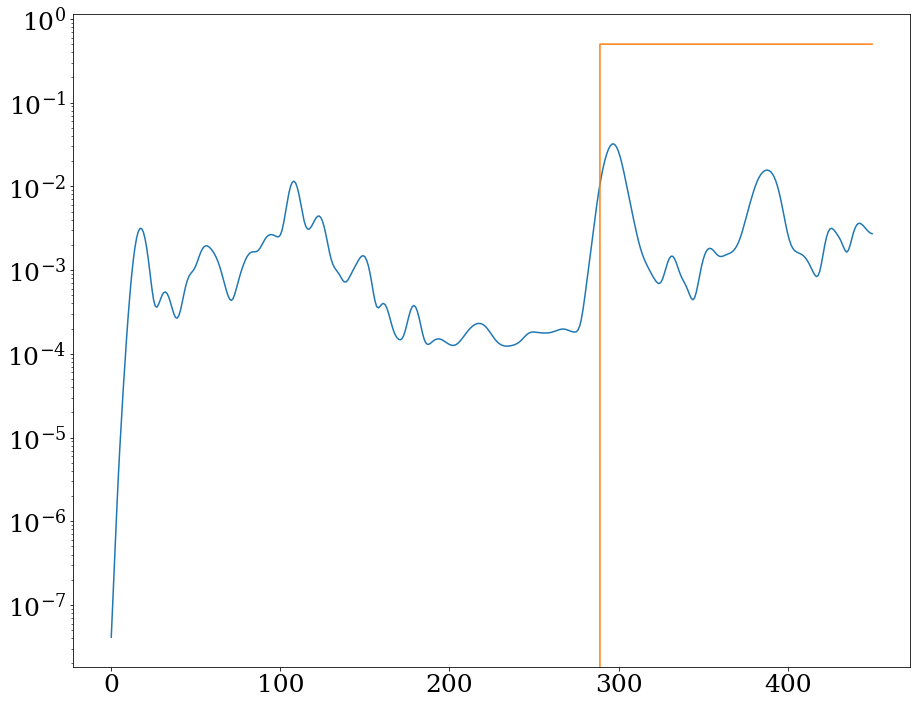

In [33]:
step = 1
frames = np.arange(stop=error_per_person.shape[1], step=step)

_ = plt.figure(figsize=(15,12))
plt.plot(frames, score_process(np.amax(error_per_person, axis=0))[::step])

plt.plot(frames, (gt/2)[::step])
plt.yscale('log')
plt.show()

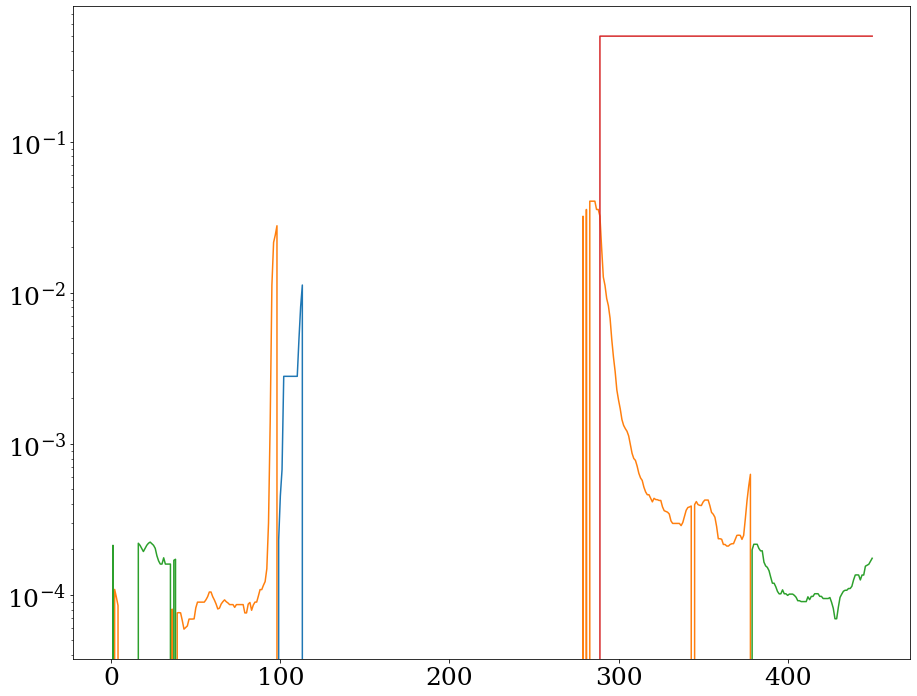

In [123]:
step = 1
frames = np.arange(stop=error_per_person.shape[1], step=step)

_ = plt.figure(figsize=(15,12))


# for i in range(error_per_person.shape[0]):


plt.plot(frames, error_per_person[3,::step])#+error_per_person[2,::step])
plt.plot(frames, error_per_person[7,::step])
plt.plot(frames, error_per_person[6,::step])
plt.plot(frames, (gt/2)[::step])
plt.yscale('log')
plt.show()

In [59]:
# 3 4 5 6

In [51]:
error_per_person[8,:100] = 0

In [ ]:
# 0 + 2 + 5 -> girl who talks 
# 1 + 9 -> girl who goes to the background
# 3 + 7first + 6 -> man who goes to the foreground
# 7second -> man who walks bad
# 8 -> other man who walks bad

## Generate $\LaTeX$ table for HR-UBnormal 

In [100]:
import pandas as pd
import re

stats_path = './data/ubnormal/stats.json'
df = pd.read_json(stats_path)

In [128]:
inverted_version_mapping = {'51':'fog', '52':'fire', '53':'smoke'}

def translate_to_original_name(clip_name):

    global inverted_version_mapping

    scene_id, clip_id = clip_name.split('.')[0].split('_')

    original_name = 'normal' if scene_id[0] == '1' else 'abnormal'
    original_name += '_scene_' + f'{int(scene_id[1:])}' + f'_scenario_{int(clip_id[:2])}'
    
    if scene_id[0] == '1':
        if int(clip_id[2:]) != 0:
            original_name += f'_{inverted_version_mapping.get(clip_id[2:], int(clip_id[2:]))}'
    else:
        if clip_id[2:] in inverted_version_mapping.keys():
            original_name += f'_{inverted_version_mapping[clip_id[2:]]}'

    return original_name, int(scene_id[1:])


def print_latex(results:pd.DataFrame, header, path):
    """
    Print the results into a LaTeX formatted string.

    :param results: list of file paths to the results or pd.DataFrame

    :return LaTeX string
    """
    
    results.columns = header
    # results.index = results.index.set_levels(results.index.levels[2].str.replace('Ndcg', 'NDCG').str.replace('-score', '') \
    #                                 .str.replace('Precision', 'P').str.replace('Recall', 'R'), level=2)
    latex = results.to_latex(path, bold_rows=True, escape=False, multicolumn=True, multirow=True, longtable=False, index=False)
    return latex

In [117]:
df_global_stats = df[:6][['global_stats']]

In [118]:
df_global_stats

,global_stats
total_number_video_frames,92640.00
discarded_frames,2151.00
percentage_discarded,2.32
total_normal_frames,42982.00
total_anomalous_frames,47507.00
percentage_anomalous,52.50


In [119]:
df_clip_stats = df[6:][['details']]

In [120]:
df_clip_stats.head()

,details
001_0100.npy,"{'number_video_frames': 131, 'discarded_frames..."
001_0200.npy,"{'number_video_frames': 151, 'discarded_frames..."
001_0400.npy,"{'number_video_frames': 451, 'discarded_frames..."
001_0500.npy,"{'number_video_frames': 451, 'discarded_frames..."
001_0600.npy,"{'number_video_frames': 151, 'discarded_frames..."


In [121]:
df_clip_stats.reset_index(inplace=True)
df_clip_stats.columns = ['clip_name', 'details']

In [122]:
df_clip_stats['clip_name'] = df_clip_stats['clip_name'].apply(lambda x: r'\verb|'+translate_to_original_name(x)[0]+'|')

In [123]:
df_clip_stats.head()

,clip_name,details
0,\verb|abnormal_scene_1_scenario_1|,"{'number_video_frames': 131, 'discarded_frames..."
1,\verb|abnormal_scene_1_scenario_2|,"{'number_video_frames': 151, 'discarded_frames..."
2,\verb|abnormal_scene_1_scenario_4|,"{'number_video_frames': 451, 'discarded_frames..."
3,\verb|abnormal_scene_1_scenario_5|,"{'number_video_frames': 451, 'discarded_frames..."
4,\verb|abnormal_scene_1_scenario_6|,"{'number_video_frames': 151, 'discarded_frames..."


In [124]:
df_clip_stats = pd.concat([df_clip_stats[['clip_name']], pd.json_normalize(df_clip_stats['details'])], axis=1)

In [125]:
df_clip_stats.head()

,clip_name,number_video_frames,discarded_frames,percentage_discarded,normal_frames,anomalous_frames,percentage_anomalous
0,\verb|abnormal_scene_1_scenario_1|,131,0,0.0,63,68,51.91
1,\verb|abnormal_scene_1_scenario_2|,151,0,0.0,76,75,49.67
2,\verb|abnormal_scene_1_scenario_4|,451,0,0.0,316,135,29.93
3,\verb|abnormal_scene_1_scenario_5|,451,0,0.0,384,67,14.86
4,\verb|abnormal_scene_1_scenario_6|,151,0,0.0,92,59,39.07


In [126]:
df_clip_stats = df_clip_stats[(df_clip_stats['clip_name'].str.contains('abnormal')) & (df_clip_stats['discarded_frames'] > 0)]
df_clip_stats.drop(['normal_frames', 'anomalous_frames'], axis=1, inplace=True)

In [129]:
header = [r'\textbf{Clip}', r'\textbf{Length}', 
          r'\textbf{Discarded}', r'\textbf{\% discarded}', #r'\textbf{Normal frames}', r'\textbf{Abnormal frames}', 
          r'\textbf{\% abnormality}']

path = './longtable.tex'

print_latex(df_clip_stats, header, path)

/tmp/ipykernel_26991/161019398.py:34: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex = results.to_latex(path, bold_rows=True, escape=False, multicolumn=True, multirow=True, longtable=False, index=False)
